<a href="https://colab.research.google.com/github/AbdulKaiz-007/AIPIP/blob/main/Online-Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  # Used for numerical calculations and data manipulation.

import pandas as pd  # Used for data analysis and handling data structures (DataFrame, Series).

import matplotlib.pyplot as plt  # Basic library for 2D plotting and data visualization.

import seaborn as sns  # Used for statistical data visualization. It is built on top of Matplotlib.

import missingno as msno  # Used for visualizing and analyzing missing data.

import plotly.express as px  # Used for interactive graphs and data visualization.

import folium  # Used for map-based visualization (geospatial data).

from folium import plugins  # Provides extra map plugins and features for Folium.

from skimpy import skim  # Used for quickly summarizing and inspecting data.

plt.rcParams["figure.figsize"] = (6,4)  # Sets the default size for the plots.

import warnings  # Used to control and manage warning messages.

warnings.filterwarnings("ignore")  # Ignores warning messages.

warnings.warn("this will not show")  # An example warning message, but it will be suppressed by the ignore filter.

pd.set_option('display.max_columns', None)  # Ensures all columns are displayed on the screen.

pd.set_option('display.max_rows', None)  # Ensures all rows are displayed on the screen.

from matplotlib.colors import LinearSegmentedColormap  # Used to create color maps for data visualizations.

In [4]:
# Load the dataset
df_original = pd.read_csv("online_sales_dataset.csv")


In [5]:
df = df_original.copy()

In [6]:
df.head(5)

InvoiceNo StockCode Description  Quantity       InvoiceDate  UnitPrice  \
0     221958  SKU_1964   White Mug        38  2020-01-01 00:00       1.71   
1     771155  SKU_1241   White Mug        18  2020-01-01 01:00      41.25   
2     231932  SKU_1501  Headphones        49  2020-01-01 02:00      29.11   
3     465838  SKU_1760   Desk Lamp        14  2020-01-01 03:00      76.68   
4     359178  SKU_1386   USB Cable       -30  2020-01-01 04:00     -68.11   

   CustomerID         Country  Discount  PaymentMethod  ShippingCost  \
0     37039.0       Australia  0.470000  Bank Transfer         10.79   
1     19144.0           Spain  0.190000        paypall          9.51   
2     50472.0         Germany  0.350000  Bank Transfer         23.03   
3     96586.0     Netherlands  0.140000        paypall         11.08   
4         NaN  United Kingdom  1.501433  Bank Transfer           NaN   

      Category SalesChannel  ReturnStatus ShipmentProvider WarehouseLocation  \
0      Apparel     In-store  Not Returned              UPS            London   
1  Electronics       Online  Not Returned              UPS              Rome   
2  Electronics       Online      Returned              UPS            Berlin   
3  Accessories       Online  Not Returned       Royal Mail              Rome   
4  Electronics     In-store  Not Returned            FedEx               NaN   

  OrderPriority  
0        Medium  
1        Medium  
2          High  
3           Low  
4        Medium

In [7]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 49782  │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 17     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA    ┃ NA %  ┃ mean    ┃ sd      ┃ p0      ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ InvoiceNo      │     0 │     0 │  550700 │  260700 │  100000 │ 324500 │ 552200 │ 776400 │ 1000000 │ ▇▇▇▇▇▇ │  │
│ │ Quantity       │     0 │     0 │   22.37 │   17.92 │     -50 │     11 │     23 │     37 │      49 │    ▇▇▇ │  │
│ │ UnitPrice      │     0 │     0 │   47.54 │   33.48 │  -99.98 │  23.59 │  48.92 │  74.61 │     100 │    ▇▇▇ │  │
│ │ CustomerID     │  4978 │    10 │   55030 │   25910 │   10000 │  32750 │  55160 │  77310 │  100000 │ ▇▇▇▇▇▇ │  │
│ │ Discount       │     0 │     0 │  0.2757 │  0.2301 │       0 │   0.13 │   0.26 │   0.38 │       2 │   ▇▃   │  │
│ │ ShippingCost   │  2489 │     5 │   17.49 │   7.221 │       5 │  11.22 │   17.5 │  23.72 │      30 │ ▇▇▇▇▇▇ │  │
│ └────────────────┴───────┴───────┴─────────┴─────────┴─────────┴────────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ StockCode                        │         0 │         0 │                        1 │                49782 │  │
│ │ Description                      │         0 │         0 │                      1.6 │                81539 │  │
│ │ InvoiceDate                      │         0 │         0 │                        2 │                99564 │  │
│ │ Country                          │         0 │         0 │                      1.2 │                58020 │  │
│ │ PaymentMethod                    │         0 │         0 │                      1.7 │                83059 │  │
│ │ Category                         │         0 │         0 │                        1 │                49782 │  │
│ │ SalesChannel                     │         0 │         0 │                        1 │                49782 │  │
│ │ ReturnStatus                     │         0 │         0 │                      1.9 │                94670 │  │
│ │ ShipmentProvider                 │         0 │         0 │                      1.2 │                62205 │  │
│ │ WarehouseLocation                │      3485 │         7 │                     0.93 │                46297 │  │
│ │ OrderPriority                    │         0 │      

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

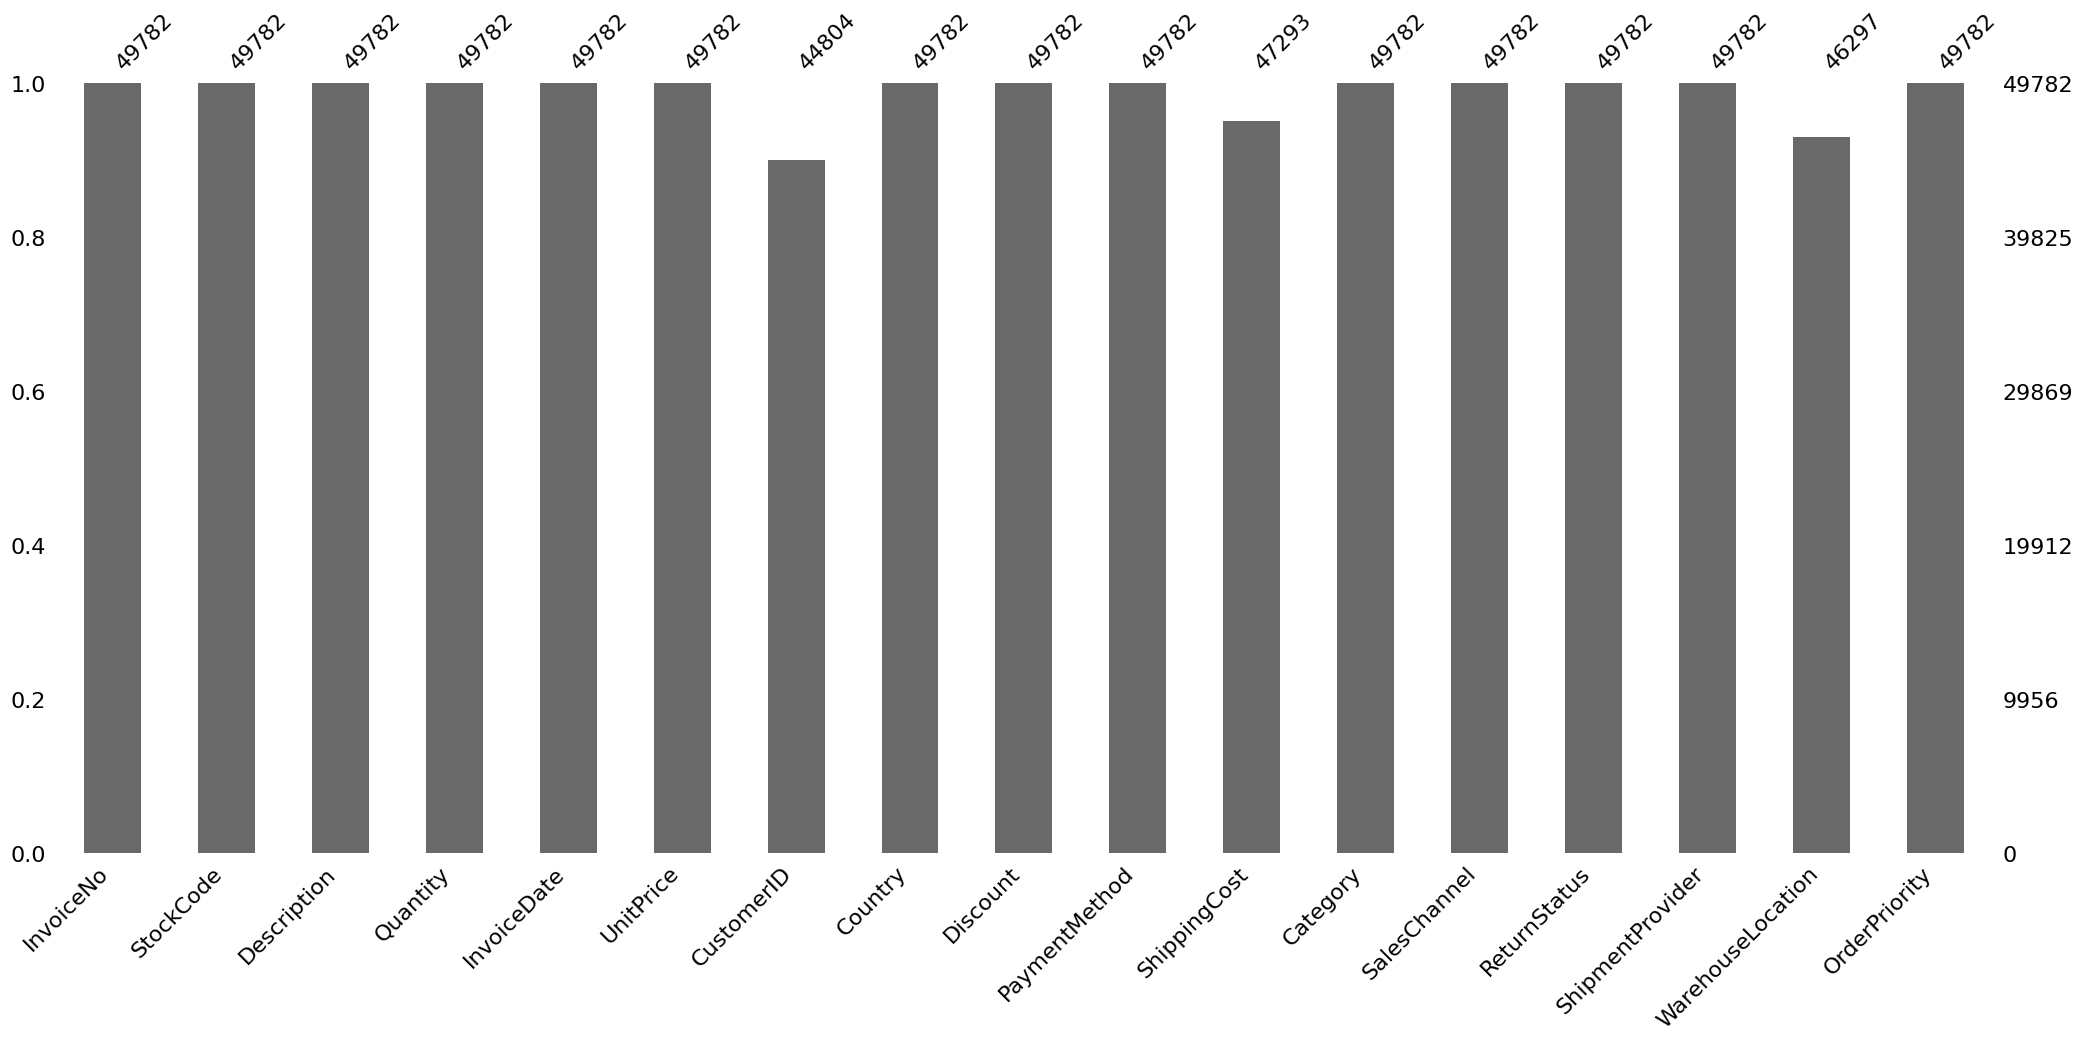

In [9]:
msno.bar(df);

In [10]:
df.describe().T

count           mean            std        min          25%  \
InvoiceNo     49782.0  550681.239946  260703.009944  100005.00  324543.0000   
Quantity      49782.0      22.372343      17.917774     -50.00      11.0000   
UnitPrice     49782.0      47.537862      33.479510     -99.98      23.5925   
CustomerID    44804.0   55032.871775   25913.660157   10001.00   32750.7500   
Discount      49782.0       0.275748       0.230077       0.00       0.1300   
ShippingCost  47293.0      17.494529       7.220557       5.00      11.2200   

                    50%        75%            max  
InvoiceNo     552244.00  776364.00  999997.000000  
Quantity          23.00      37.00      49.000000  
UnitPrice         48.92      74.61     100.000000  
CustomerID     55165.00   77306.25   99998.000000  
Discount           0.26       0.38       1.999764  
ShippingCost      17.50      23.72      30.000000

from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_16.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_24['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='count', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='mean', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='std', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_28['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_28, x='min', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [11]:
# We observed that there are 1,493 negative values in the column by applying the following condition.
df[df["UnitPrice"] < 0]["UnitPrice"].count()

1493

In [12]:
df["UnitPrice"] = df["UnitPrice"].abs()

In [13]:
df[df["UnitPrice"] < 0]["UnitPrice"].count()

0

In [14]:
df[df["Quantity"] < 0]["Quantity"].count()

2489

In [15]:
df["Quantity"] = df["Quantity"].abs()

In [16]:
df[df["Quantity"] < 0]["Quantity"].count()

0

In [17]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 49782  │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 17     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA    ┃ NA %  ┃ mean    ┃ sd      ┃ p0      ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ InvoiceNo      │     0 │     0 │  550700 │  260700 │  100000 │ 324500 │ 552200 │ 776400 │ 1000000 │ ▇▇▇▇▇▇ │  │
│ │ Quantity       │     0 │     0 │   24.93 │   14.15 │       1 │     13 │     25 │     37 │      50 │ ▇▇▇▇▇▇ │  │
│ │ UnitPrice      │     0 │     0 │   50.63 │    28.6 │       1 │  25.86 │  50.55 │  75.37 │     100 │ ▇▇▇▇▇▇ │  │
│ │ CustomerID     │  4978 │    10 │   55030 │   25910 │   10000 │  32750 │  55160 │  77310 │  100000 │ ▇▇▇▇▇▇ │  │
│ │ Discount       │     0 │     0 │  0.2757 │  0.2301 │       0 │   0.13 │   0.26 │   0.38 │       2 │   ▇▃   │  │
│ │ ShippingCost   │  2489 │     5 │   17.49 │   7.221 │       5 │  11.22 │   17.5 │  23.72 │      30 │ ▇▇▇▇▇▇ │  │
│ └────────────────┴───────┴───────┴─────────┴─────────┴─────────┴────────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ StockCode                        │         0 │         0 │                        1 │                49782 │  │
│ │ Description                      │         0 │         0 │                      1.6 │                81539 │  │
│ │ InvoiceDate                      │         0 │         0 │                        2 │                99564 │  │
│ │ Country                          │         0 │         0 │                      1.2 │                58020 │  │
│ │ PaymentMethod                    │         0 │         0 │                      1.7 │                83059 │  │
│ │ Category                         │         0 │         0 │                        1 │                49782 │  │
│ │ SalesChannel                     │         0 │         0 │                        1 │                49782 │  │
│ │ ReturnStatus                     │         0 │         0 │                      1.9 │                94670 │  │
│ │ ShipmentProvider                 │         0 │         0 │                      1.2 │                62205 │  │
│ │ WarehouseLocation                │      3485 │         7 │                     0.93 │                46297 │  │
│ │ OrderPriority                    │         0 │      

In [18]:
df["PaymentMethod"].value_counts()

PaymentMethod
Bank Transfer    16747
Credit Card      16530
paypall          16505
Name: count, dtype: int64

In [19]:
df["PaymentMethod"].replace("paypall", "Paypall", inplace=True)


In [20]:
df["PaymentMethod"].value_counts()

PaymentMethod
Bank Transfer    16747
Credit Card      16530
Paypall          16505
Name: count, dtype: int64

In [21]:
df.head(1)

InvoiceNo StockCode Description  Quantity       InvoiceDate  UnitPrice  \
0     221958  SKU_1964   White Mug        38  2020-01-01 00:00       1.71   

   CustomerID    Country  Discount  PaymentMethod  ShippingCost Category  \
0     37039.0  Australia      0.47  Bank Transfer         10.79  Apparel   

  SalesChannel  ReturnStatus ShipmentProvider WarehouseLocation OrderPriority  
0     In-store  Not Returned              UPS            London        Medium

In [22]:
df["StockCode"] = df["StockCode"].str.lstrip("SKU_").astype("int")

In [23]:
#We observed that the data type has changed.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  int64  
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

In [24]:
df["CustomerID"].head(5)

0    37039.0
1    19144.0
2    50472.0
3    96586.0
4        NaN
Name: CustomerID, dtype: float64

In [25]:
#We converted the Nan values ​​in the 'CustomerID' column to 'Object' data type to make them 'Unknow'. Here we make a direct integer and
# We tried removing '.0' values. It gave an error due to NaN values.
df["CustomerID"] = df["CustomerID"].astype("object")

In [26]:
# We filled in NaN values.
df["CustomerID"].fillna("Unknown", inplace=True)

In [27]:
# We changed the data type to 'str' to delete the redundant value '.0' in this line. Since the '.0' value is not deleted once, each character
# we deleted separately.
df["CustomerID"] = df["CustomerID"].astype("str").str.rstrip("0").str.rstrip(".")

In [28]:
df["CustomerID"].head(5)

0      37039
1      19144
2      50472
3      96586
4    Unknown
Name: CustomerID, dtype: object

In [29]:
df["Discount"].head()

0    0.470000
1    0.190000
2    0.350000
3    0.140000
4    1.501433
Name: Discount, dtype: float64

In [30]:
# We arranged it to have 2 digits after the dot with the 'Round' parameter.
df["Discount"] = df["Discount"].round(2)

In [31]:
df["Discount"].head()

0    0.47
1    0.19
2    0.35
3    0.14
4    1.50
Name: Discount, dtype: float64

In [32]:
df.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID              0
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64

In [33]:
# “ShippingCost” column average value calculation
df["ShippingCost"].mean()

17.49452921151122

In [34]:
# Calculate “ShippingCost” average value based on “Country” column
df.groupby("Country")["ShippingCost"].mean().mean()

17.49455195055477

In [35]:
df.groupby("ShipmentProvider")["ShippingCost"].mean().mean()

17.494364720265526

In [36]:
df.groupby("WarehouseLocation")["ShippingCost"].mean().mean()

17.48266955767786

In [37]:
df["ShippingCost"].fillna(17.49, inplace=True)

In [38]:
df.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID              0
Country                 0
Discount                0
PaymentMethod           0
ShippingCost            0
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64

In [39]:
# Detection of NaN values in “WarehouseLocation” Column
df.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID              0
Country                 0
Discount                0
PaymentMethod           0
ShippingCost            0
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64

In [40]:
df["WarehouseLocation"].value_counts()

WarehouseLocation
Amsterdam    9458
London       9230
Rome         9226
Berlin       9210
Paris        9173
Name: count, dtype: int64

In [41]:
# We've brought the unique version except for NaN.
warehouse_locations = df['WarehouseLocation'].dropna().unique()
warehouse_locations

array(['London', 'Rome', 'Berlin', 'Amsterdam', 'Paris'], dtype=object)

In [42]:
df['WarehouseLocation'] =  df['WarehouseLocation'].apply(lambda x: np.random.choice(warehouse_locations) if pd.isna(x) else x)

In [43]:
df["WarehouseLocation"].value_counts()

WarehouseLocation
Amsterdam    10156
Rome          9944
London        9924
Berlin        9903
Paris         9855
Name: count, dtype: int64

In [44]:
# We checked that the NaN values are full.
df.isnull().sum()

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID           0
Country              0
Discount             0
PaymentMethod        0
ShippingCost         0
Category             0
SalesChannel         0
ReturnStatus         0
ShipmentProvider     0
WarehouseLocation    0
OrderPriority        0
dtype: int64

In [45]:
df.describe().T

count           mean            std       min          25%  \
InvoiceNo     49782.0  550681.239946  260703.009944  100005.0  324543.0000   
StockCode     49782.0    1497.690029     288.660958    1000.0    1248.0000   
Quantity      49782.0      24.925555      14.152125       1.0      13.0000   
UnitPrice     49782.0      50.625031      28.597658       1.0      25.8625   
Discount      49782.0       0.275750       0.230086       0.0       0.1300   
ShippingCost  49782.0      17.494303       7.037732       5.0      11.5400   

                     50%        75%       max  
InvoiceNo     552244.000  776364.00  999997.0  
StockCode       1495.000    1748.00    1999.0  
Quantity          25.000      37.00      50.0  
UnitPrice         50.555      75.37     100.0  
Discount           0.260       0.38       2.0  
ShippingCost      17.490      23.41      30.0

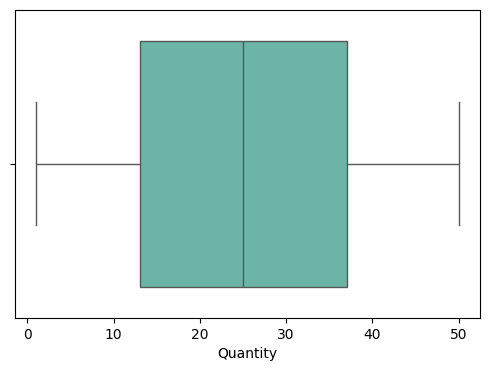

In [46]:
sns.boxplot(data = df, x = "Quantity", color="#60C1AD" );

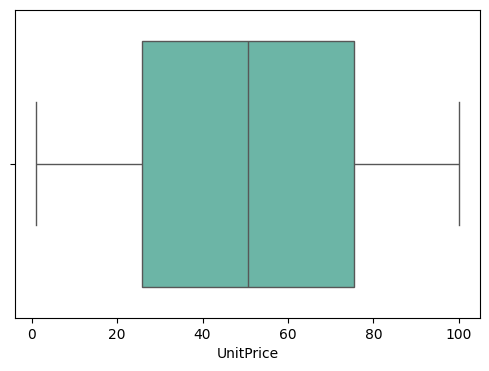

In [47]:
sns.boxplot(data = df, x = "UnitPrice", color="#60C1AD");

In [48]:
df[df["Discount"] > 0.755]["Discount"].count()

996

In [49]:
# Finding Q1, Q2, Q3.
Q1=df["Discount"].quantile(0.25)
Q2=df["Discount"].quantile(0.50)
Q3=df["Discount"].quantile(0.75)
print(f"Q1={Q1}, Q2={Q2}, Q3={Q3}")

Q1=0.13, Q2=0.26, Q3=0.38


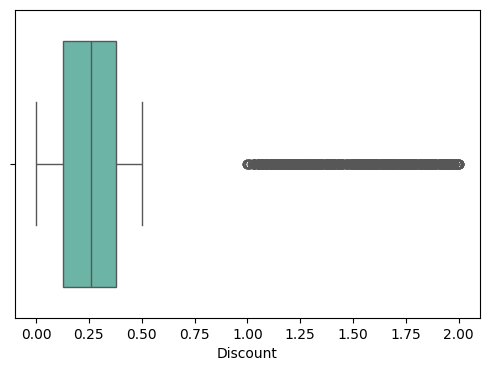

In [50]:
# Finding IQR, MIN, MAX values and visualizing outlier values with boxplot.
# Q1=0.13,Q2=0.26,Q3=0.38
# IQR= Q3-Q1 -->  0.38- 0.13= 0.25
# MİN= Q1-(1.5 * IQR) --> 0.13-(1.5 * 0.25) = - 0,245
# MAX= Q3+(1.5 * IQR) --> 0.38+(1.5 * 0.25) = 0,755
sns.boxplot(data = df, x = "Discount", color="#60C1AD");


In [51]:
# With reference to the MAX value, we took all values below 0.755 and removed all outlier values.

df = df[df["Discount"] <= 0.755]

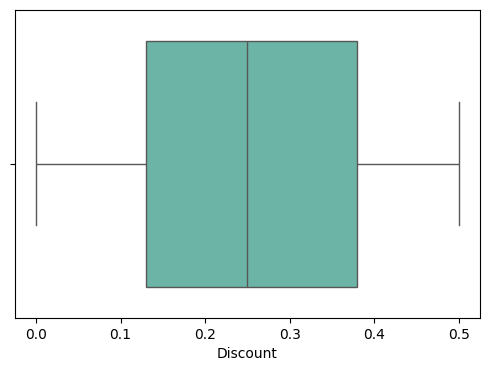

In [52]:
sns.boxplot(data = df, x = "Discount", color="#60C1AD");

In [54]:
df.head()

InvoiceNo  StockCode   Description  Quantity       InvoiceDate  UnitPrice  \
0     221958       1964     White Mug        38  2020-01-01 00:00       1.71   
1     771155       1241     White Mug        18  2020-01-01 01:00      41.25   
2     231932       1501    Headphones        49  2020-01-01 02:00      29.11   
3     465838       1760     Desk Lamp        14  2020-01-01 03:00      76.68   
5     744167       1006  Office Chair        47  2020-01-01 05:00      70.16   

  CustomerID      Country  Discount  PaymentMethod  ShippingCost     Category  \
0      37039    Australia      0.47  Bank Transfer         10.79      Apparel   
1      19144        Spain      0.19        Paypall          9.51  Electronics   
2      50472      Germany      0.35  Bank Transfer         23.03  Electronics   
3      96586  Netherlands      0.14        Paypall         11.08  Accessories   
5      53887       Sweden      0.48    Credit Card         13.98  Electronics   

  SalesChannel  ReturnStatus ShipmentProvider WarehouseLocation OrderPriority  
0     In-store  Not Returned              UPS            London        Medium  
1       Online  Not Returned              UPS              Rome        Medium  
2       Online      Returned              UPS            Berlin          High  
3       Online  Not Returned       Royal Mail              Rome           Low  
5       Online  Not Returned              DHL            London        Medium

from matplotlib import pyplot as plt
_df_29['InvoiceNo'].plot(kind='hist', bins=20, title='InvoiceNo')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30['StockCode'].plot(kind='hist', bins=20, title='StockCode')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32['UnitPrice'].plot(kind='hist', bins=20, title='UnitPrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_33.groupby('Description').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_34.groupby('InvoiceDate').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_35.groupby('CustomerID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_36.groupby('Country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='InvoiceNo', y='StockCode', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='StockCode', y='Quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='Quantity', y='UnitPrice', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_40.plot(kind='scatter', x='UnitPrice', y='Discount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['InvoiceDate']
  ys = series['InvoiceNo']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('InvoiceDate', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Description')):
  _plot_series(series, series_name, i)
  fig.legend(title='Description', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('InvoiceDate')
_ = plt.ylabel('InvoiceNo')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['InvoiceDate']
  ys = series['InvoiceNo']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('InvoiceDate', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('InvoiceDate')):
  _plot_series(series, series_name, i)
  fig.legend(title='InvoiceDate', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('InvoiceDate')
_ = plt.ylabel('InvoiceNo')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['InvoiceDate']
  ys = series['InvoiceNo']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_43.sort_values('InvoiceDate', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('CustomerID')):
  _plot_series(series, series_name, i)
  fig.legend(title='CustomerID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('InvoiceDate')
_ = plt.ylabel('InvoiceNo')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['InvoiceDate']
  ys = series['InvoiceNo']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_44.sort_values('InvoiceDate', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Country')):
  _plot_series(series, series_name, i)
  fig.legend(title='Country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('InvoiceDate')
_ = plt.ylabel('InvoiceNo')

from matplotlib import pyplot as plt
_df_45['InvoiceNo'].plot(kind='line', figsize=(8, 4), title='InvoiceNo')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['StockCode'].plot(kind='line', figsize=(8, 4), title='StockCode')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_48['UnitPrice'].plot(kind='line', figsize=(8, 4), title='UnitPrice')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['InvoiceDate'].value_counts()
    for x_label, grp in _df_49.groupby('Description')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Description')
_ = plt.ylabel('InvoiceDate')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['CustomerID'].value_counts()
    for x_label, grp in _df_50.groupby('InvoiceDate')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('InvoiceDate')
_ = plt.ylabel('CustomerID')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Country'].value_counts()
    for x_label, grp in _df_51.groupby('CustomerID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('CustomerID')
_ = plt.ylabel('Country')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['PaymentMethod'].value_counts()
    for x_label, grp in _df_52.groupby('Country')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Country')
_ = plt.ylabel('PaymentMethod')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_53['Description'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_53, x='InvoiceNo', y='Description', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_54['InvoiceDate'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_54, x='InvoiceNo', y='InvoiceDate', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_55['CustomerID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_55, x='InvoiceNo', y='CustomerID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_56['Country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_56, x='InvoiceNo', y='Country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [55]:
df["TotalCost"] = ((df["Quantity"] * df["UnitPrice"]) - ((df["Quantity"] * df["UnitPrice"]) *
                  df["Discount"]) + df["ShippingCost"]).round(2)

In [56]:
df.sample(1)

InvoiceNo  StockCode   Description  Quantity       InvoiceDate  \
4187     509064       1040  Office Chair        16  2020-06-23 11:00   

      UnitPrice CustomerID Country  Discount  PaymentMethod  ShippingCost  \
4187      80.43      58345   Spain      0.37  Bank Transfer         13.23   

       Category SalesChannel ReturnStatus ShipmentProvider WarehouseLocation  \
4187  Furniture     In-store     Returned            FedEx            London   

     OrderPriority  TotalCost  
4187        Medium     823.96

In [57]:
df.head(1)

InvoiceNo  StockCode Description  Quantity       InvoiceDate  UnitPrice  \
0     221958       1964   White Mug        38  2020-01-01 00:00       1.71   

  CustomerID    Country  Discount  PaymentMethod  ShippingCost Category  \
0      37039  Australia      0.47  Bank Transfer         10.79  Apparel   

  SalesChannel  ReturnStatus ShipmentProvider WarehouseLocation OrderPriority  \
0     In-store  Not Returned              UPS            London        Medium   

   TotalCost  
0      45.23

In [58]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48786 entries, 0 to 49781
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   InvoiceNo          48786 non-null  int64         
 1   StockCode          48786 non-null  int64         
 2   Description        48786 non-null  object        
 3   Quantity           48786 non-null  int64         
 4   InvoiceDate        48786 non-null  datetime64[ns]
 5   UnitPrice          48786 non-null  float64       
 6   CustomerID         48786 non-null  object        
 7   Country            48786 non-null  object        
 8   Discount           48786 non-null  float64       
 9   PaymentMethod      48786 non-null  object        
 10  ShippingCost       48786 non-null  float64       
 11  Category           48786 non-null  object        
 12  SalesChannel       48786 non-null  object        
 13  ReturnStatus       48786 non-null  object        
 14  ShipmentPro

In [60]:
# We created a column named “InvoiceYear”.
df["InvoiceYear"] = df['InvoiceDate'].dt.year

In [61]:
df["InvoiceMonth"] = df['InvoiceDate'].dt.month

In [62]:
df["InvoiceDay"] = df['InvoiceDate'].dt.day

In [63]:
# We created a column named “InvoiceTime”.
df["InvoiceTime"] = df['InvoiceDate'].dt.time


In [64]:
df = df.drop('InvoiceDate', axis=1)

In [65]:
df.head(1)

InvoiceNo  StockCode Description  Quantity  UnitPrice CustomerID  \
0     221958       1964   White Mug        38       1.71      37039   

     Country  Discount  PaymentMethod  ShippingCost Category SalesChannel  \
0  Australia      0.47  Bank Transfer         10.79  Apparel     In-store   

   ReturnStatus ShipmentProvider WarehouseLocation OrderPriority  TotalCost  \
0  Not Returned              UPS            London        Medium      45.23   

   InvoiceYear  InvoiceMonth  InvoiceDay InvoiceTime  
0         2020             1           1    00:00:00

In [66]:
df.groupby(["Category","Description"]).size()

Category     Description   
Accessories  Backpack          904
             Blue Pen          864
             Desk Lamp         877
             Headphones        859
             Notebook          911
             Office Chair      902
             T-shirt           852
             USB Cable         883
             Wall Clock        925
             White Mug         919
             Wireless Mouse    877
Apparel      Backpack          864
             Blue Pen          895
             Desk Lamp         898
             Headphones        907
             Notebook          835
             Office Chair      878
             T-shirt           899
             USB Cable         911
             Wall Clock        895
             White Mug         841
             Wireless Mouse    861
Electronics  Backpack          878
             Blue Pen          876
             Desk Lamp         894
             Headphones        894
             Notebook          852
             Office Chair      850
             T-shirt           880
             USB Cable         940
             Wall Clock        904
             White Mug         883
             Wireless Mouse    868
Furniture    Backpack          957
             Blue Pen          869
             Desk Lamp         918
             Headphones        913
             Notebook          864
             Office Chair      900
             T-shirt           894
             USB Cable         871
             Wall Clock        864
             White Mug         895
             Wireless Mouse    922
Stationery   Backpack          877
             Blue Pen          913
             Desk Lamp         869
             Headphones        877
             Notebook          901
             Office Chair      901
             T-shirt           856
             USB Cable         897
             Wall Clock        913
             White Mug         913
             Wireless Mouse    826
dtype: int64

In [67]:
# We made a correct grouping for the Category column.
Category = {
    'Backpack': 'Accessory',
    'Blue Pen': 'Stationer',
    'Notebook': 'Stationer',
    'Office Chair': 'Furniture',
    'Wall Clock': 'Accessory',
    'White Mug': 'Accessory',
    'Wireless Mouse': 'Electronics',
    'USB Cable': 'Electronics',
    'Headphones': 'Electronics',
    'T-shirt': 'Apparel',
    'Desk Lamp':'Accessory'
}

In [68]:
df['Category'] = df['Description'].map(Category)

In [69]:
df.groupby(["Category","Description"]).size()

Category     Description   
Accessory    Backpack          4480
             Desk Lamp         4456
             Wall Clock        4501
             White Mug         4451
Apparel      T-shirt           4381
Electronics  Headphones        4450
             USB Cable         4502
             Wireless Mouse    4354
Furniture    Office Chair      4431
Stationer    Blue Pen          4417
             Notebook          4363
dtype: int64

In [70]:
# We made a country-based total sales volume calculation.
total_cost_by_country = df.groupby("Country")[["TotalCost"]].sum().sort_values("TotalCost", ascending = False ).reset_index()
total_cost_by_country

Country   TotalCost
0          Belgium  4039735.26
1           Sweden  3986722.16
2   United Kingdom  3985433.67
3    United States  3958837.41
4          Germany  3946976.16
5           France  3920133.19
6         Portugal  3903108.64
7            Spain  3878873.43
8           Norway  3877461.99
9            Italy  3851780.50
10       Australia  3822776.49
11     Netherlands  3768055.08

from matplotlib import pyplot as plt
total_cost_by_country['TotalCost'].plot(kind='hist', bins=20, title='TotalCost')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
total_cost_by_country['TotalCost'].plot(kind='line', figsize=(8, 4), title='TotalCost')
plt.gca().spines[['top', 'right']].set_visible(False)

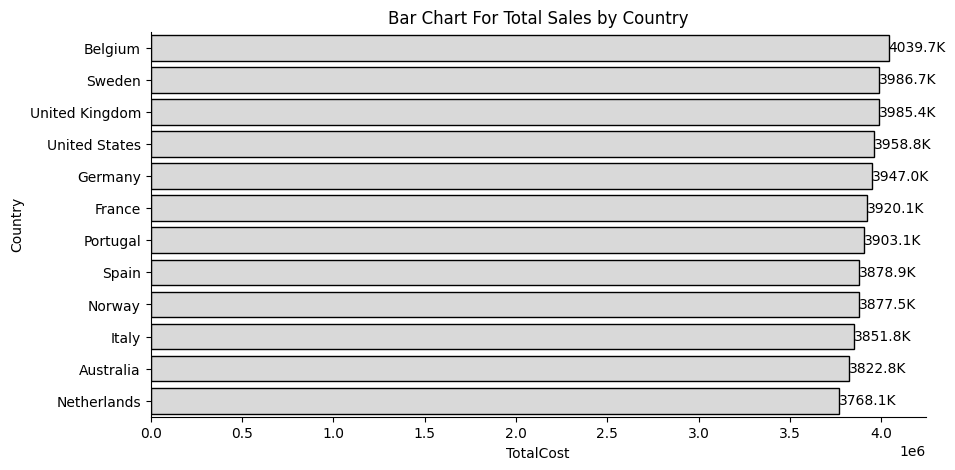

In [71]:
# We made a visualization in the bar chart using the “total_cost_by_country” data we created above.
paletta = sns.light_palette("seagreen", n_colors=6)
plt.figure(figsize=(10,5))
ax = sns.barplot(data = total_cost_by_country, x = "TotalCost", y ="Country", ci = None, color="#d9d9d9" )
plt.title("Bar Chart For Total Sales by Country")

for p in ax.patches:
        p.set_color('#D9D9D9')
        p.set_linewidth(1)
        p.set_edgecolor('black')

for p in ax.patches:
    ax.annotate(f'{p.get_width() * 1e-3:.1f}K',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')
    plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [72]:
# We have identified the total number of payment methods.
payment_Method = df["PaymentMethod"].value_counts()
payment_Method

PaymentMethod
Bank Transfer    16439
Credit Card      16214
Paypall          16133
Name: count, dtype: int64

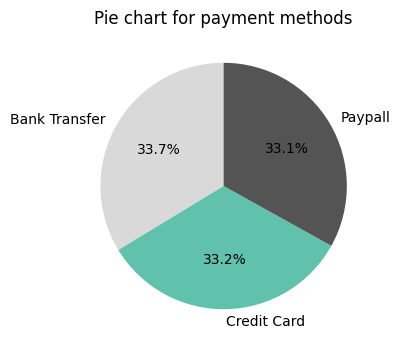

In [73]:
# Using the “pament_method” dataframe we created above, we made a visualization in the pie chart graph.

plt.figure()
plt.pie(payment_Method,
        labels=payment_Method.index,
        autopct='%1.1f%%',
        startangle=90,
        colors = ["#d9d9d9", "#60C1AD", "#545454"]
       )
plt.title("Pie chart for payment methods");

In [74]:
# We used dictionary to categorize seasonally.
mevsimler = {
    1: 'Winter',   # Ocak
    2: 'Winter',   # Şubat
    3: 'Spring',   # Mart
    4: 'Spring',   # Nisan
    5: 'Spring',   # Mayıs
    6: 'Summer',   # Haziran
    7: 'Summer',   # Temmuz
    8: 'Summer',   # Ağustos
    9: 'Autumn',   # Eylül
    10: 'Autumn',  # Ekim
    11: 'Autumn',  # Kasım
    12: 'Winter'   # Aralık
}

In [75]:
df['InvoiceSeason'] = df['InvoiceMonth'].map(mevsimler)

In [76]:
# Created dataframe to be used for visualization.
seasonal_trends = df.groupby("InvoiceSeason")[["TotalCost", "Quantity"]].sum(). reset_index()
seasonal_trends["sorting"] = [3,1,2,4]
seasonal_trends = seasonal_trends.sort_values(by="sorting")
seasonal_trends

InvoiceSeason    TotalCost  Quantity  sorting
1        Spring  12459055.37    324128        1
2        Summer  12444403.82    321194        2
0        Autumn  10509981.98    270901        3
3        Winter  11526452.81    299701        4

from matplotlib import pyplot as plt
seasonal_trends['TotalCost'].plot(kind='hist', bins=20, title='TotalCost')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
seasonal_trends['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
seasonal_trends['sorting'].plot(kind='hist', bins=20, title='sorting')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
seasonal_trends.groupby('InvoiceSeason').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
seasonal_trends.plot(kind='scatter', x='TotalCost', y='Quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
seasonal_trends.plot(kind='scatter', x='Quantity', y='sorting', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sorting']
  ys = series['TotalCost']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = seasonal_trends.sort_values('sorting', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('InvoiceSeason')):
  _plot_series(series, series_name, i)
  fig.legend(title='InvoiceSeason', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sorting')
_ = plt.ylabel('TotalCost')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sorting']
  ys = series['Quantity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = seasonal_trends.sort_values('sorting', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('InvoiceSeason')):
  _plot_series(series, series_name, i)
  fig.legend(title='InvoiceSeason', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sorting')
_ = plt.ylabel('Quantity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['sorting']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'sorting'}, axis=1)
              .sort_values('sorting', ascending=True))
  xs = counted['sorting']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = seasonal_trends.sort_values('sorting', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('InvoiceSeason')):
  _plot_series(series, series_name, i)
  fig.legend(title='InvoiceSeason', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sorting')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
seasonal_trends['TotalCost'].plot(kind='line', figsize=(8, 4), title='TotalCost')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
seasonal_trends['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
seasonal_trends['sorting'].plot(kind='line', figsize=(8, 4), title='sorting')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(seasonal_trends['InvoiceSeason'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(seasonal_trends, x='TotalCost', y='InvoiceSeason', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(seasonal_trends['InvoiceSeason'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(seasonal_trends, x='Quantity', y='InvoiceSeason', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(seasonal_trends['InvoiceSeason'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(seasonal_trends, x='sorting', y='InvoiceSeason', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

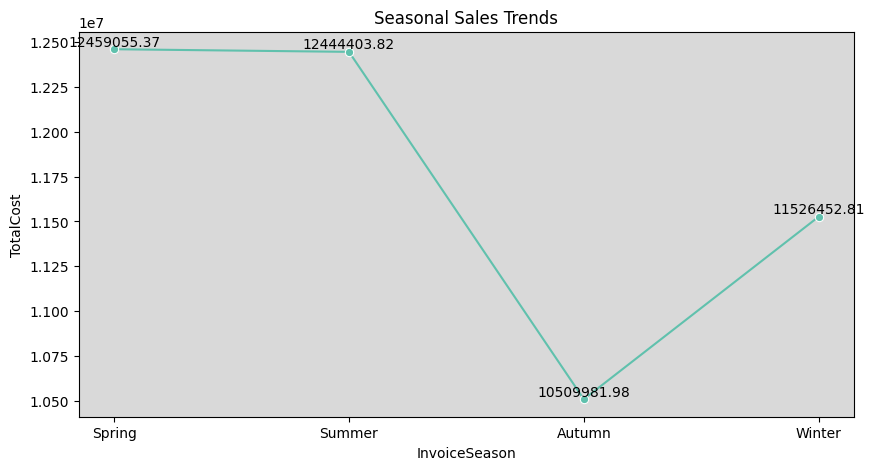

In [77]:
# Data Total cost volumes by seasons visualized in line plot.
plt.figure(figsize=(10,5))
ax = sns.lineplot(data = seasonal_trends, x = "InvoiceSeason", y = "TotalCost", ci=None, marker = 'o', color= "#60C1AD" )
ax.set_facecolor("#d9d9d9")
for x, y in zip(seasonal_trends["InvoiceSeason"], seasonal_trends["TotalCost"]):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')
plt.title("Seasonal Sales Trends");

In [78]:
# Total monthly sales listed
InvoiceMonth_Totalcost=df.groupby("InvoiceMonth")["TotalCost"].sum()
InvoiceMonth_Totalcost

InvoiceMonth
1     4200564.45
2     3832852.39
3     4209414.65
4     4091330.47
5     4158310.25
6     4064771.28
7     4134075.00
8     4245557.54
9     3524791.07
10    3549283.46
11    3435907.45
12    3493035.97
Name: TotalCost, dtype: float64

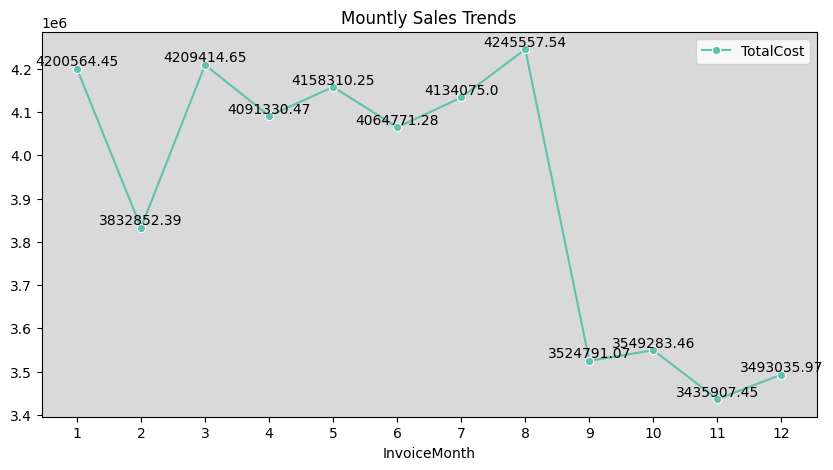

In [79]:
# Overall total sales figures by month were visualized.
plt.figure(figsize=(10,5))
ax=sns.lineplot( x=InvoiceMonth_Totalcost.index, y=InvoiceMonth_Totalcost.values, marker='o',label="TotalCost", color= "#60C1AD")
plt.title("Mountly Sales Trends")
ax.set_facecolor("#d9d9d9")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12]);
for x, y in zip(InvoiceMonth_Totalcost.index, InvoiceMonth_Totalcost.values):
    plt.text(x, y, f'{y}',
             ha='center',
             va='bottom')

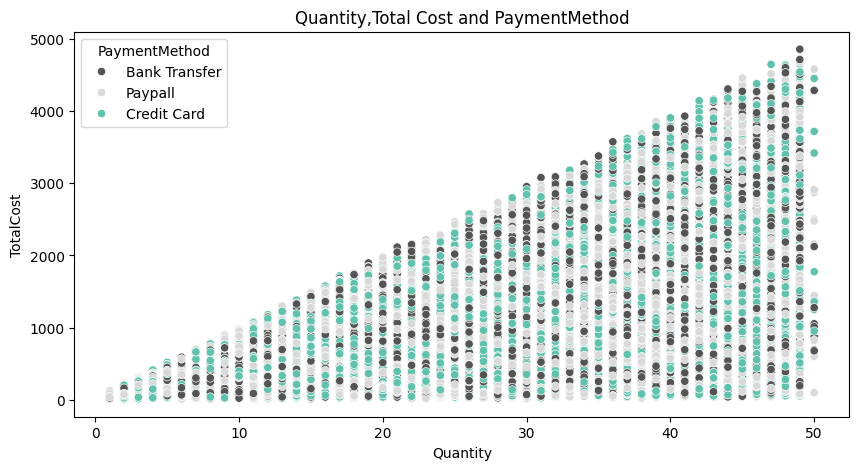

In [80]:
 #We have seen the distribution of payment methods depending on Total Cost and Quantity
plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x = "Quantity", y = "TotalCost",
                palette={"#d9d9d9", "#60C1AD", "#545454"},
                hue = "PaymentMethod")
plt.title("Quantity,Total Cost and PaymentMethod");


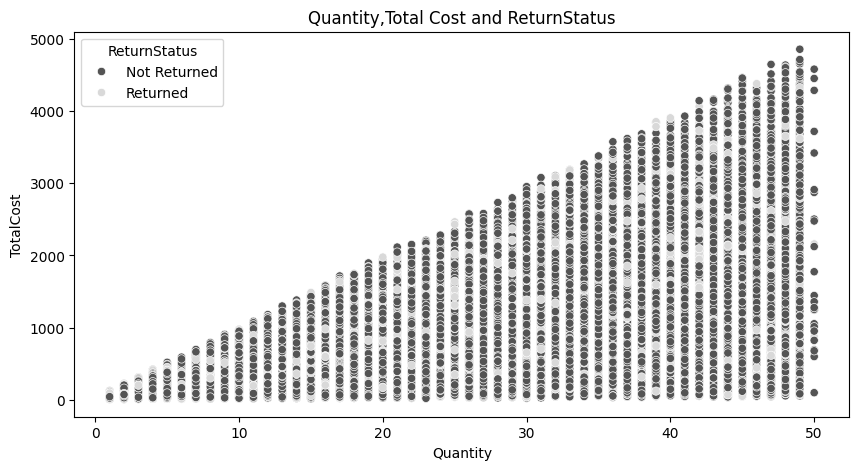

In [81]:
# We have seen the distribution of ReturnStatus depending on Total Cost and Quantity.
plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x = "Quantity", y = "TotalCost",
                palette={"#d9d9d9", "#545454"},
                hue = "ReturnStatus")
plt.title("Quantity,Total Cost and ReturnStatus");

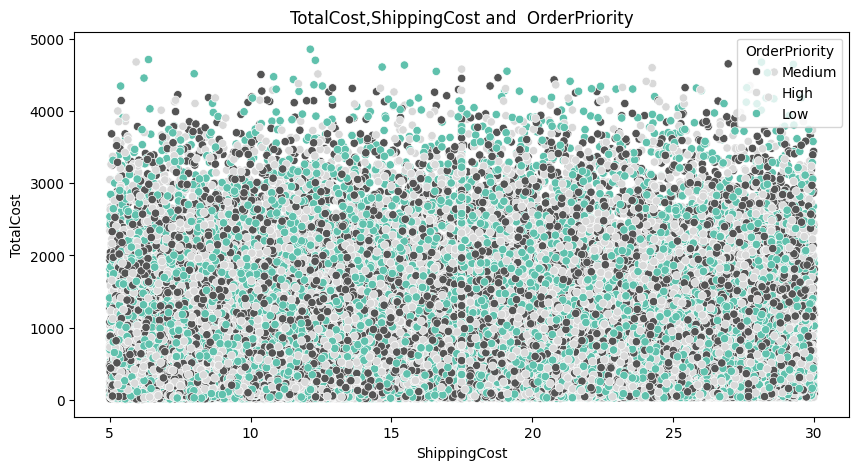

In [82]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x = "ShippingCost", y = "TotalCost",
                palette={"#d9d9d9", "#60C1AD", "#545454"},
                hue = "OrderPriority")
plt.title("TotalCost,ShippingCost and  OrderPriority");

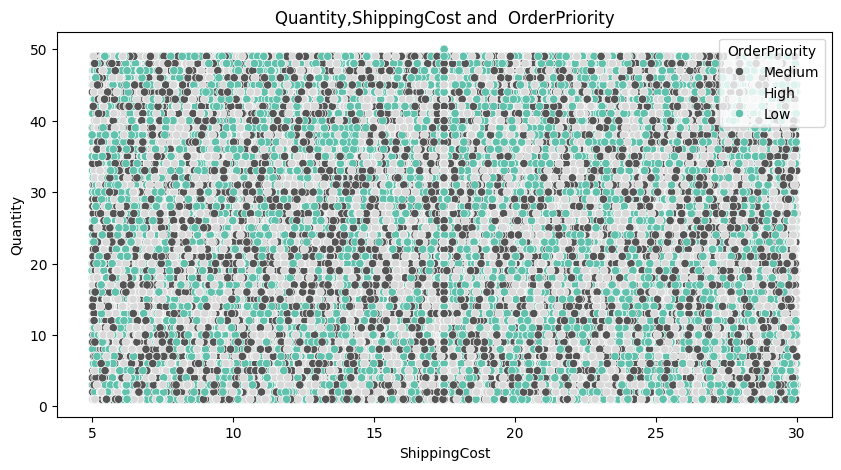

In [83]:
# We have seen the Quantity distribution based on ShippingCost and TotalCost quantities.
plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x = "ShippingCost", y = "Quantity",
                palette={"#d9d9d9", "#60C1AD", "#545454"},
                hue = "OrderPriority")
plt.title("Quantity,ShippingCost and  OrderPriority");

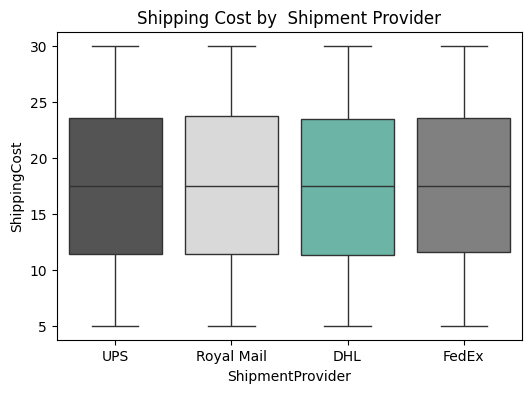

In [84]:
sns.boxplot(data = df, x = "ShipmentProvider",
            y = "ShippingCost",
            palette= {"#545454", "#d9d9d9", "#60C1AD", "#808080" }
           )
plt.title("Shipping Cost by  Shipment Provider");

In [85]:
# List of total sales volume by product
Top_Performing_Products=df.groupby("Description")["TotalCost"].sum().sort_values(ascending=False)
Top_Performing_Products

Description
White Mug         4388500.43
USB Cable         4341416.70
Desk Lamp         4284698.73
Wall Clock        4283150.15
Headphones        4277776.50
Backpack          4276568.39
Blue Pen          4273240.86
Wireless Mouse    4245664.21
Notebook          4201949.24
Office Chair      4192376.91
T-shirt           4174551.86
Name: TotalCost, dtype: float64

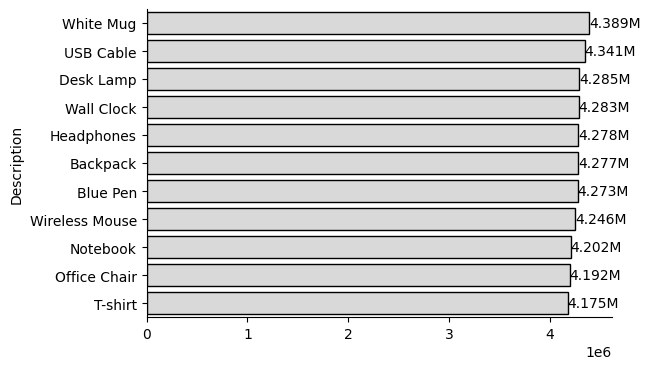

In [86]:
# Chart of total sales quantity to products
plt.figure()
ax=sns.barplot(x=Top_Performing_Products.values,y=Top_Performing_Products.index)
for p in ax.patches:
        p.set_color('#D9D9D9')  # Diğer çubukların rengi
        p.set_linewidth(1)      # Çizgi kalınlığını değiştirme
        p.set_edgecolor('black') # Kenar rengini ayarlama
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{p.get_width() * 1e-6:.3f}M',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')

In [87]:
# Bar chart for top 10 products by revenue
Top_Performing_Products=df["Description"].value_counts()
Top_Performing_Products

Description
USB Cable         4502
Wall Clock        4501
Backpack          4480
Desk Lamp         4456
White Mug         4451
Headphones        4450
Office Chair      4431
Blue Pen          4417
T-shirt           4381
Notebook          4363
Wireless Mouse    4354
Name: count, dtype: int64

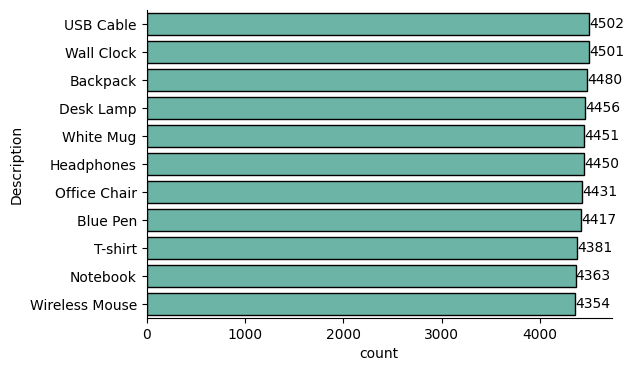

In [88]:
# Total sales figures by product
ax = sns.countplot(data = df, y = "Description", order = Top_Performing_Products.index, color="#60C1AD")
for p in ax.patches:
        p.set_edgecolor('black') # Kenar rengini ayarlama
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)

for p in ax.containers:
    ax.bar_label(p);

In [89]:
corr=df[["Quantity","TotalCost","ShippingCost"]].corr()

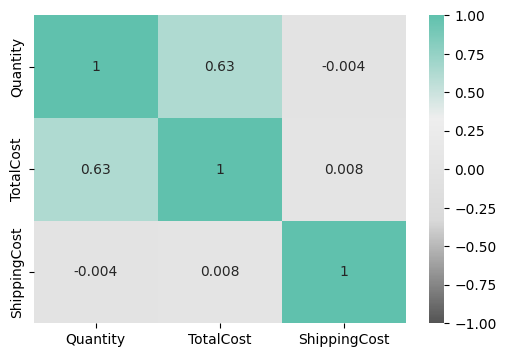

In [90]:

from matplotlib.colors import LinearSegmentedColormap

custom_cmap = LinearSegmentedColormap.from_list("custom_palette", ["#545454", "#d9d9d9", "#eeeeee", "#60C1AD"])

plt.figure()

sns.heatmap(corr, annot=True, cmap=custom_cmap, vmin=-1, vmax=1);

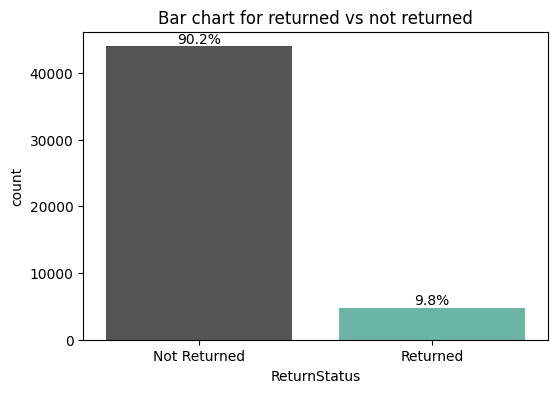

In [91]:
ax=sns.countplot(data=df,x="ReturnStatus",palette={"#545454","#60C1AD"})
total = len(df)
plt.title("Bar chart for returned vs not returned")
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / total)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

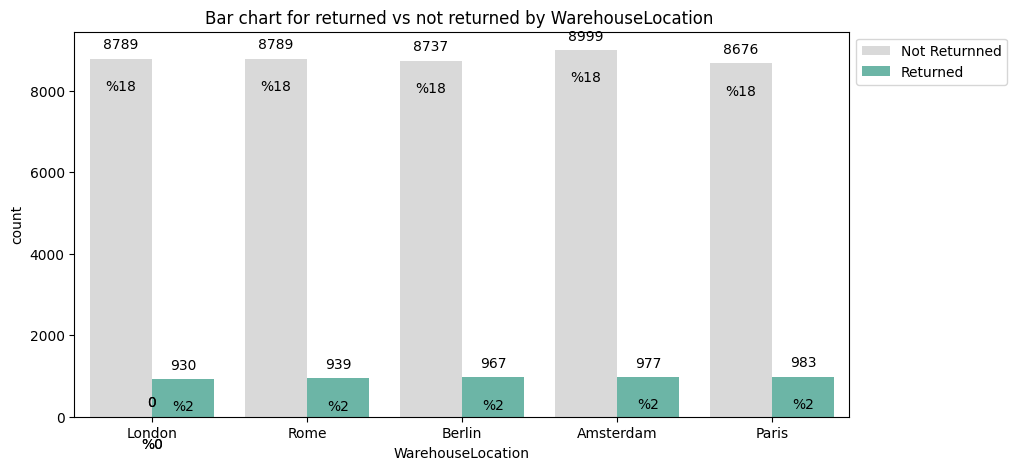

In [92]:
# We visualized the returned and non-returned products according to the warehouse sent in the bar chart.

fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.countplot(data = df, x = "WarehouseLocation", hue = "ReturnStatus", palette={"#60C1AD","#D9D9D9"})
total = len(df)


total = len(df)


for p in ax.patches:
    height = p.get_height()


    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., p.get_height() - 0.5),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    percentage = 100 * height / total
    ax.annotate(f'%{percentage:.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, -20), textcoords='offset points')
    plt.legend(['Not Returnned', 'Returned'], loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Bar chart for returned vs not returned by WarehouseLocation ")

plt.show()


In [93]:
# Total values of the SalesChannel column.
Sales_Channel = df["SalesChannel"].value_counts()
Sales_Channel

SalesChannel
Online      24542
In-store    24244
Name: count, dtype: int64

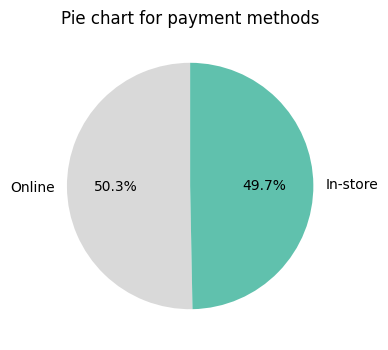

In [94]:
plt.figure()
plt.pie(Sales_Channel,
        labels=Sales_Channel.index,
        autopct='%1.1f%%',
        startangle=90,
        colors = ["#d9d9d9", "#60C1AD", "#545454"]
       )
plt.title("Pie chart for payment methods");

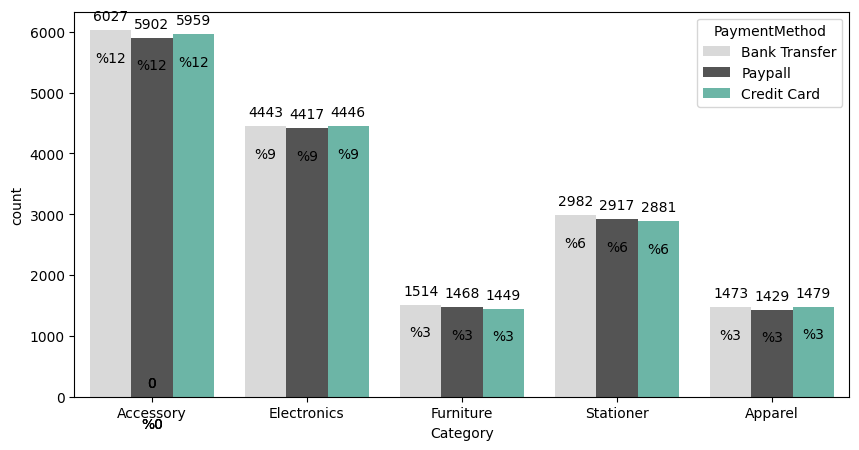

In [95]:
# We visualized the actual payment method rates by product category.
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.countplot(data = df, x = "Category", hue = "PaymentMethod", palette={"#545454","#60C1AD","#D9D9D9"})
total = len(df)


total = len(df)


for p in ax.patches:
    height = p.get_height()


    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., p.get_height() - 0.5),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    percentage = 100 * height / total
    ax.annotate(f'%{percentage:.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, -20), textcoords='offset points')

plt.show()


In [96]:
top_10_customer_id=df.groupby("CustomerID")["TotalCost"].sum().sort_values(ascending=False).head(11)
top_10_customer_id=pd.DataFrame(top_10_customer_id).reset_index()
top_10_customer_id=top_10_customer_id[top_10_customer_id["CustomerID"] != "Unknown"]
top_10_customer_id

CustomerID  TotalCost
1       84431    9824.97
2       81067    9741.42
3       81631    8776.23
4       98923    8719.21
5       80001    8599.53
6       76402    8269.63
7       29700    8068.44
8       72172    7913.42
9       52808    7883.90
10      26371    7763.11

from matplotlib import pyplot as plt
top_10_customer_id['TotalCost'].plot(kind='hist', bins=20, title='TotalCost')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_10_customer_id['TotalCost'].plot(kind='line', figsize=(8, 4), title='TotalCost')
plt.gca().spines[['top', 'right']].set_visible(False)

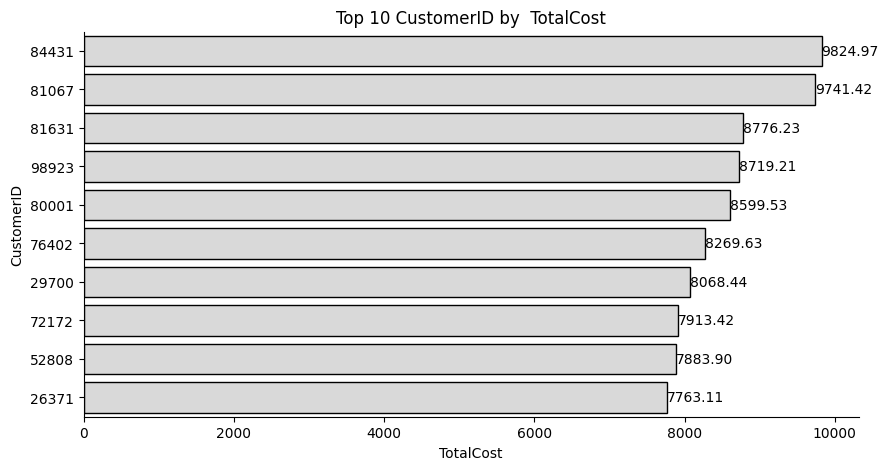

In [97]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=top_10_customer_id,y="CustomerID",x="TotalCost")
for p in ax.patches:
        p.set_color('#D9D9D9')
        p.set_linewidth(1)
        p.set_edgecolor('black')
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
plt.title("Top 10 CustomerID by  TotalCost")
for p in ax.patches:
    ax.annotate(f'{p.get_width() * 1e-0:.2f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')

In [98]:
# List of invoice number of Customer IDs in the Top 10 List
customer_ids = ['84431', '81067', '81631', '98923', '80001', '76402', '29700', '72172', '52808', '26371']

# Filter these CustomerIDs and count them with value_counts
top_10_Invoice_count = pd.DataFrame(df[df["CustomerID"].isin(customer_ids)]["CustomerID"].value_counts()).reset_index()
top_10_Invoice_count

CustomerID  count
0      81631      5
1      76402      4
2      80001      4
3      72172      3
4      81067      3
5      52808      3
6      98923      3
7      26371      3
8      84431      3
9      29700      2

from matplotlib import pyplot as plt
top_10_Invoice_count['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_10_Invoice_count['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

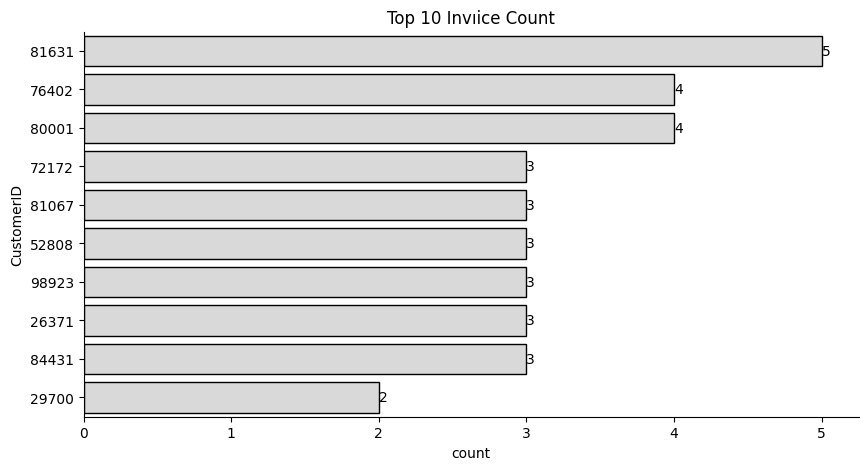

In [99]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=top_10_Invoice_count,y="CustomerID",x="count")
plt.title("Top 10 Invıice Count")
for p in ax.patches:
        p.set_color('#D9D9D9')
        p.set_linewidth(1)
        p.set_edgecolor('black')
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{p.get_width() * 1e-0:.0f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')

In [100]:
product_count=df.groupby("Description")["Quantity"].sum().sort_values(ascending=False)
product_count

Description
USB Cable         113136
Wall Clock        112210
White Mug         111862
Backpack          111267
Desk Lamp         111006
Blue Pen          110113
Office Chair      109938
Headphones        109855
Wireless Mouse    109718
T-shirt           108622
Notebook          108197
Name: Quantity, dtype: int64

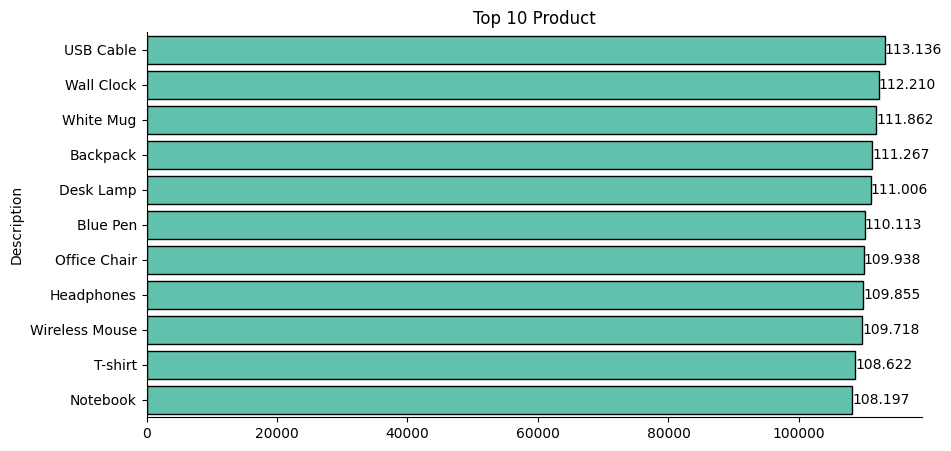

In [101]:
plt.figure(figsize=(10,5))
ax=sns.barplot(
    x=product_count.values,
    y=product_count.index,
    color="#60C1AD"
              );
plt.title("Top 10 Product")
for p in ax.patches:
        p.set_color('#60C1AD')
        p.set_linewidth(1)
        p.set_edgecolor('black')
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{p.get_width() * 1e-3:.3f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')


In [102]:
df.head()

InvoiceNo  StockCode   Description  Quantity  UnitPrice CustomerID  \
0     221958       1964     White Mug        38       1.71      37039   
1     771155       1241     White Mug        18      41.25      19144   
2     231932       1501    Headphones        49      29.11      50472   
3     465838       1760     Desk Lamp        14      76.68      96586   
5     744167       1006  Office Chair        47      70.16      53887   

       Country  Discount  PaymentMethod  ShippingCost     Category  \
0    Australia      0.47  Bank Transfer         10.79    Accessory   
1        Spain      0.19        Paypall          9.51    Accessory   
2      Germany      0.35  Bank Transfer         23.03  Electronics   
3  Netherlands      0.14        Paypall         11.08    Accessory   
5       Sweden      0.48    Credit Card         13.98    Furniture   

  SalesChannel  ReturnStatus ShipmentProvider WarehouseLocation OrderPriority  \
0     In-store  Not Returned              UPS            London        Medium   
1       Online  Not Returned              UPS              Rome        Medium   
2       Online      Returned              UPS            Berlin          High   
3       Online  Not Returned       Royal Mail              Rome           Low   
5       Online  Not Returned              DHL            London        Medium   

   TotalCost  InvoiceYear  InvoiceMonth  InvoiceDay InvoiceTime InvoiceSeason  
0      45.23         2020             1           1    00:00:00        Winter  
1     610.93         2020             1           1    01:00:00        Winter  
2     950.18         2020             1           1    02:00:00        Winter  
3     934.31         2020             1           1    03:00:00        Winter  
5    1728.69         2020             1           1    05:00:00        Winter